# Spotify Feature Processing & Analysis

### Cleaning audio features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
audio_features = pd.read_csv('../data/compressed/lyrics_spotify_features.csv')
spotify_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

audio_features['spotify_genre_list'] = audio_features.apply(lambda x: x['genius_genre'] if pd.isnull(x['spotify_genre_list']) else x['spotify_genre_list'], axis=1) # Fill missing spotify_genre_list with genius_genre
print(audio_features.isnull().sum())


title                 0
genius_genre          0
artist                0
year                  0
lyrics                0
danceability          0
energy                0
loudness              0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
spotify_genre_list    0
dtype: int64


## Analysis

### Analysis Of Spotify Features

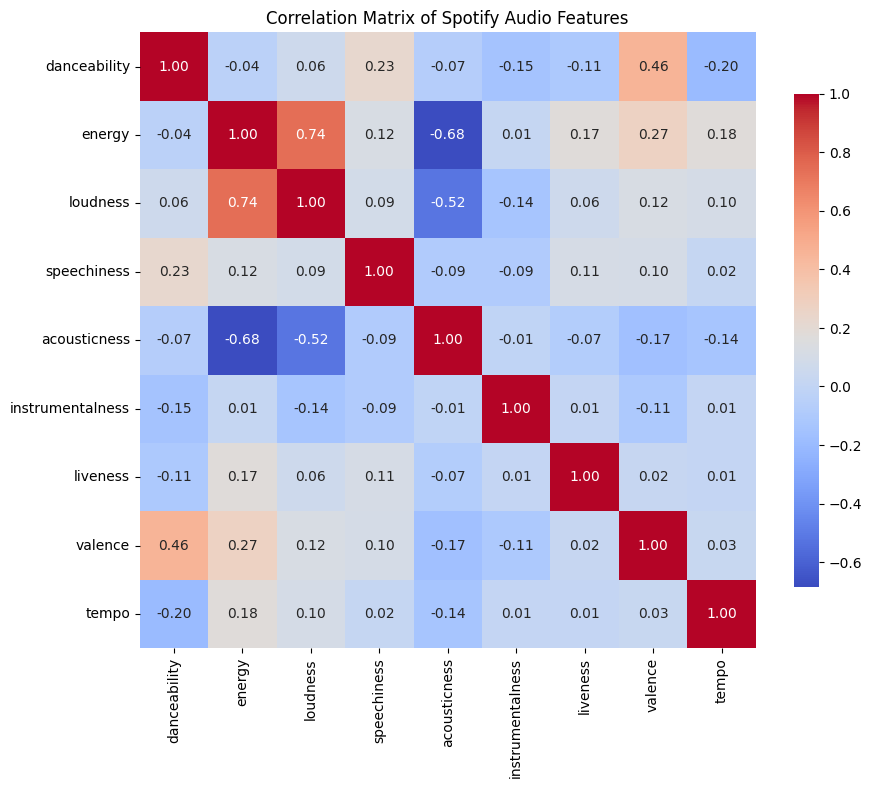

In [3]:

corr = audio_features[spotify_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Spotify Audio Features')   
plt.show()

#### Historical Trends of Spotify Features

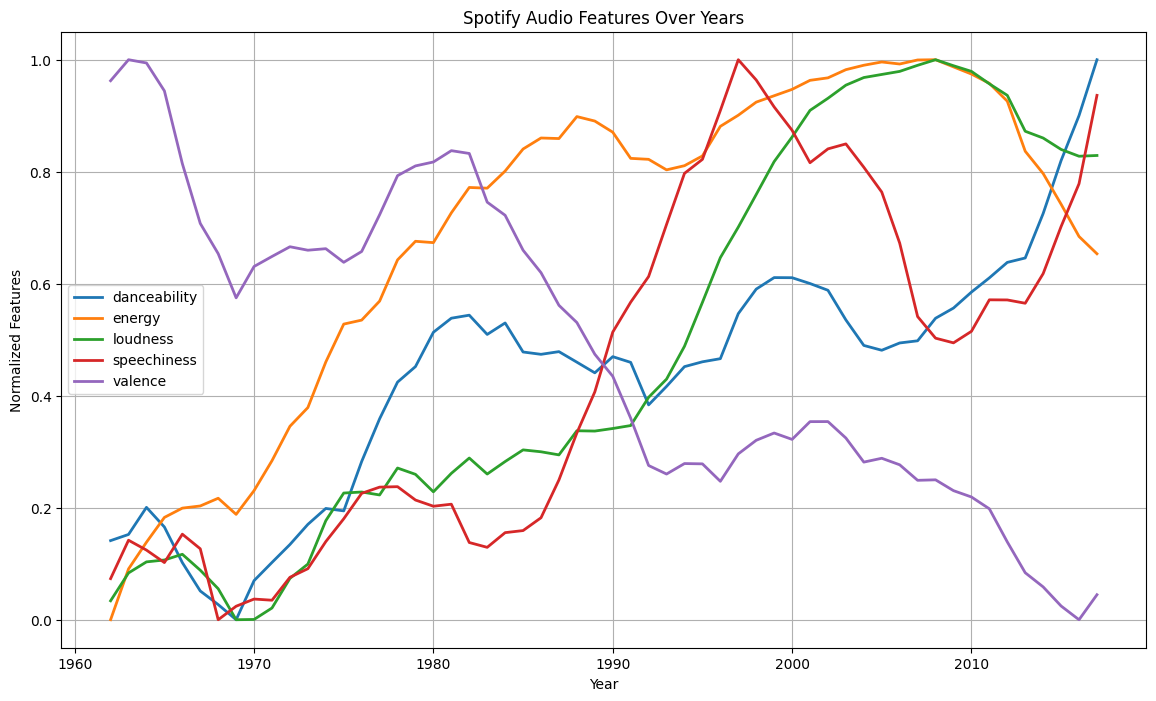

In [4]:
some_features = ['danceability', 'energy', 'loudness', 'speechiness', 'valence']
year = audio_features.groupby('year')[some_features].mean().rolling(window=5, center=True).mean()
year_norm = (year - year.min()) / (year.max() - year.min())
plt.figure(figsize=(14, 8))
for feature in some_features:
    plt.plot(year_norm.index, year_norm[feature], label=feature, linewidth=2)
plt.title('Spotify Audio Features Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Features')
plt.legend()
plt.grid(True)
plt.show()



## Feature Engineering

### Party Potential vs. Chill Score

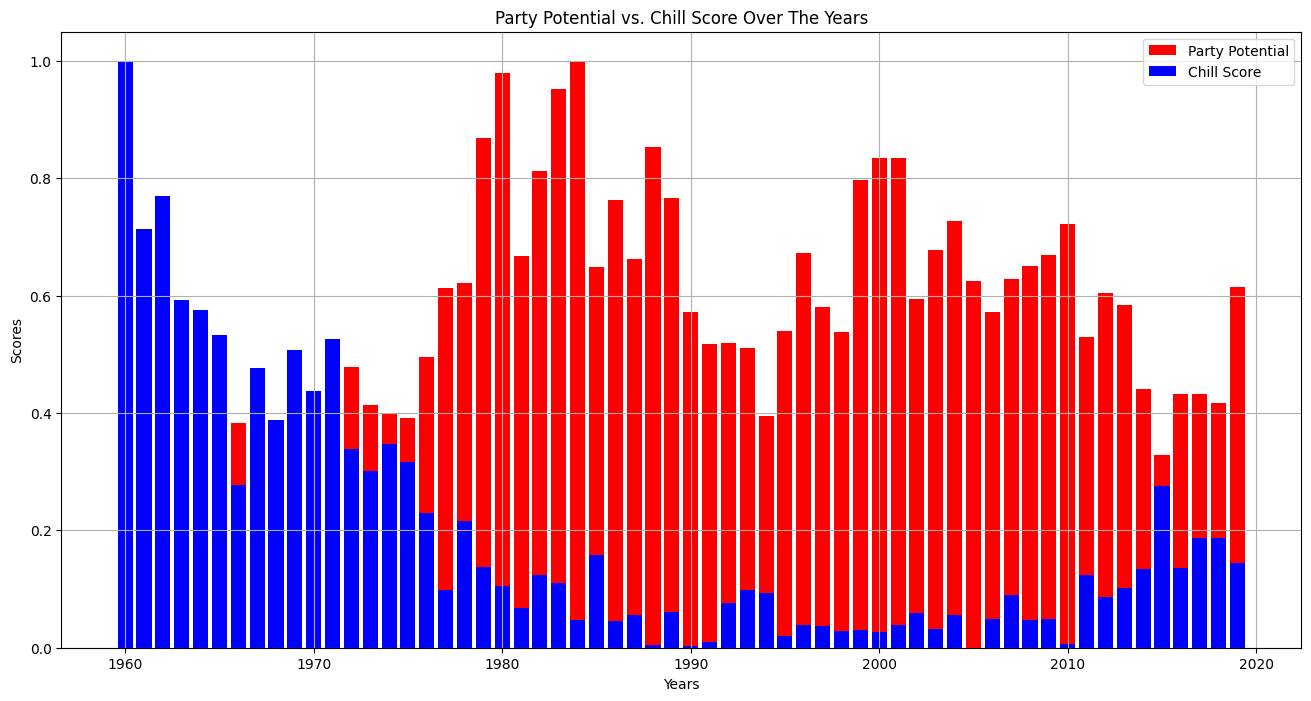

In [8]:

audio_features['party_potential'] = audio_features['danceability'] * audio_features['energy'] * audio_features['valence']
audio_features['chill_score'] = audio_features['acousticness'] * (1 - audio_features['energy']) * (1 - audio_features['valence'])

audio_features.to_csv('../data/compressed/lyrics_spotify_features.csv', index=False)


yearly_scores = audio_features.groupby('year')[['party_potential', 'chill_score']].mean()
year_norm = (yearly_scores - yearly_scores.min()) / (yearly_scores.max() - yearly_scores.min())

plt.figure(figsize=(16, 8))
plt.bar(year_norm.index, year_norm['party_potential'], label='Party Potential', color = 'red')
plt.bar(year_norm.index, year_norm['chill_score'], label = 'Chill Score', color = 'blue')
plt.title('Party Potential vs. Chill Score Over The Years')
plt.ylabel('Scores')
plt.xlabel('Years')
plt.legend()
plt.grid(True)
plt.show()





### Outliers Within Spotify Features

#### Valence vs Acousticness

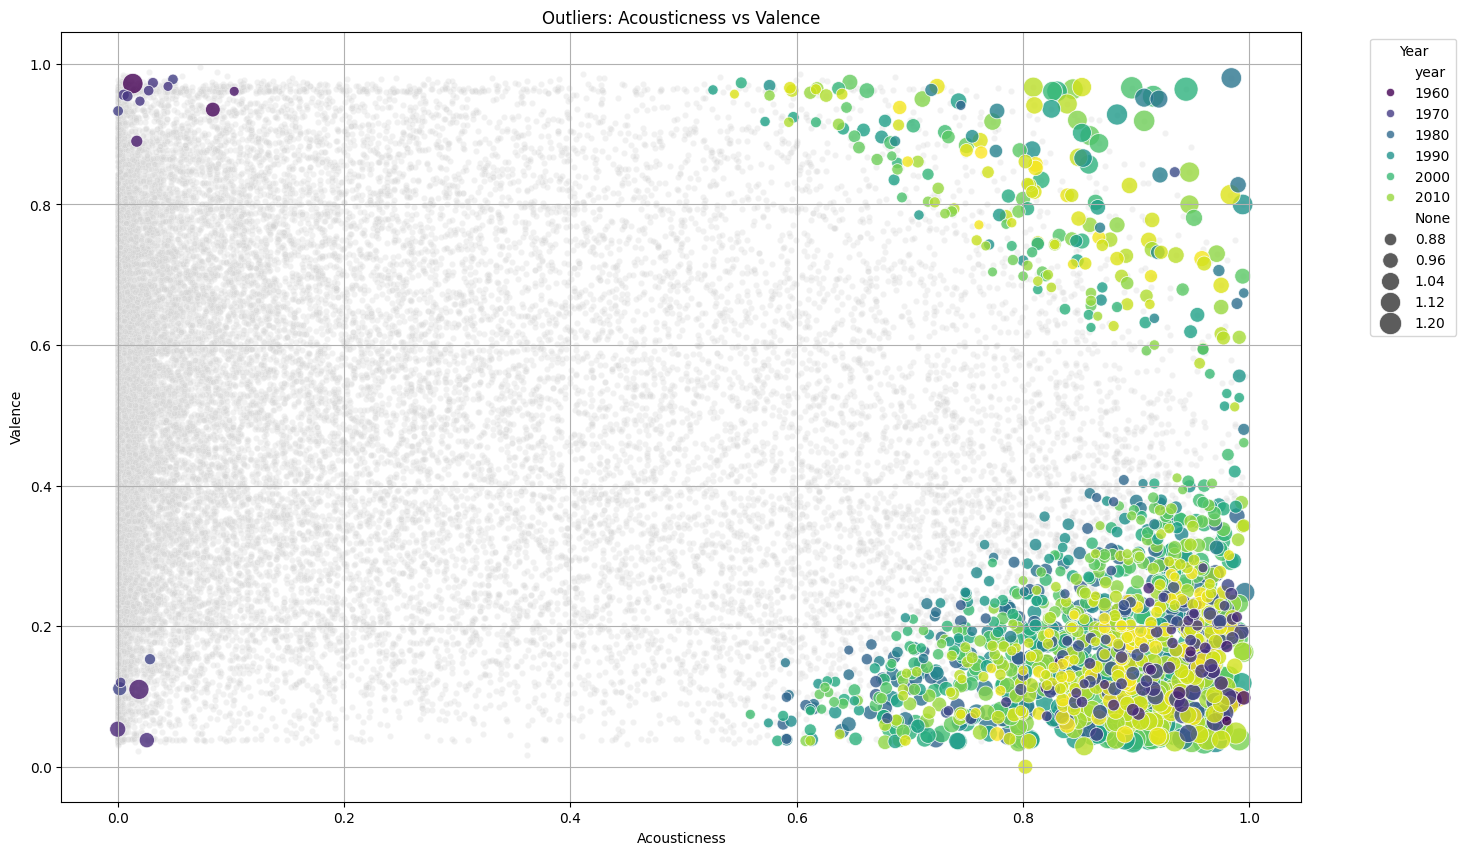

In [6]:


yearly_trend = audio_features.groupby('year')[['valence', 'acousticness']].mean()

valence_deviation = (audio_features['valence'] - audio_features['year'].map(yearly_trend['valence'])).abs()
acoustic_deviation = (audio_features['acousticness'] - audio_features['year'].map(yearly_trend['acousticness'])).abs()

trend_outlier_score = valence_deviation + acoustic_deviation


top_outliers = audio_features.loc[trend_outlier_score.nlargest(int(0.05*len(audio_features))).index]

plt.figure(figsize=(16,10))

sns.scatterplot(x='acousticness',y='valence',data=audio_features,color='lightgray',alpha=0.3, s=20)

sns.scatterplot(x='acousticness', y='valence',data=top_outliers,hue='year',palette='viridis',size=trend_outlier_score.loc[top_outliers.index],  sizes=(50, 300),alpha=0.8)

plt.title("Outliers: Acousticness vs Valence")
plt.xlabel("Acousticness")
plt.ylabel("Valence")
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05,1), loc=2)
plt.show()



#### Instrumentalness vs Energy

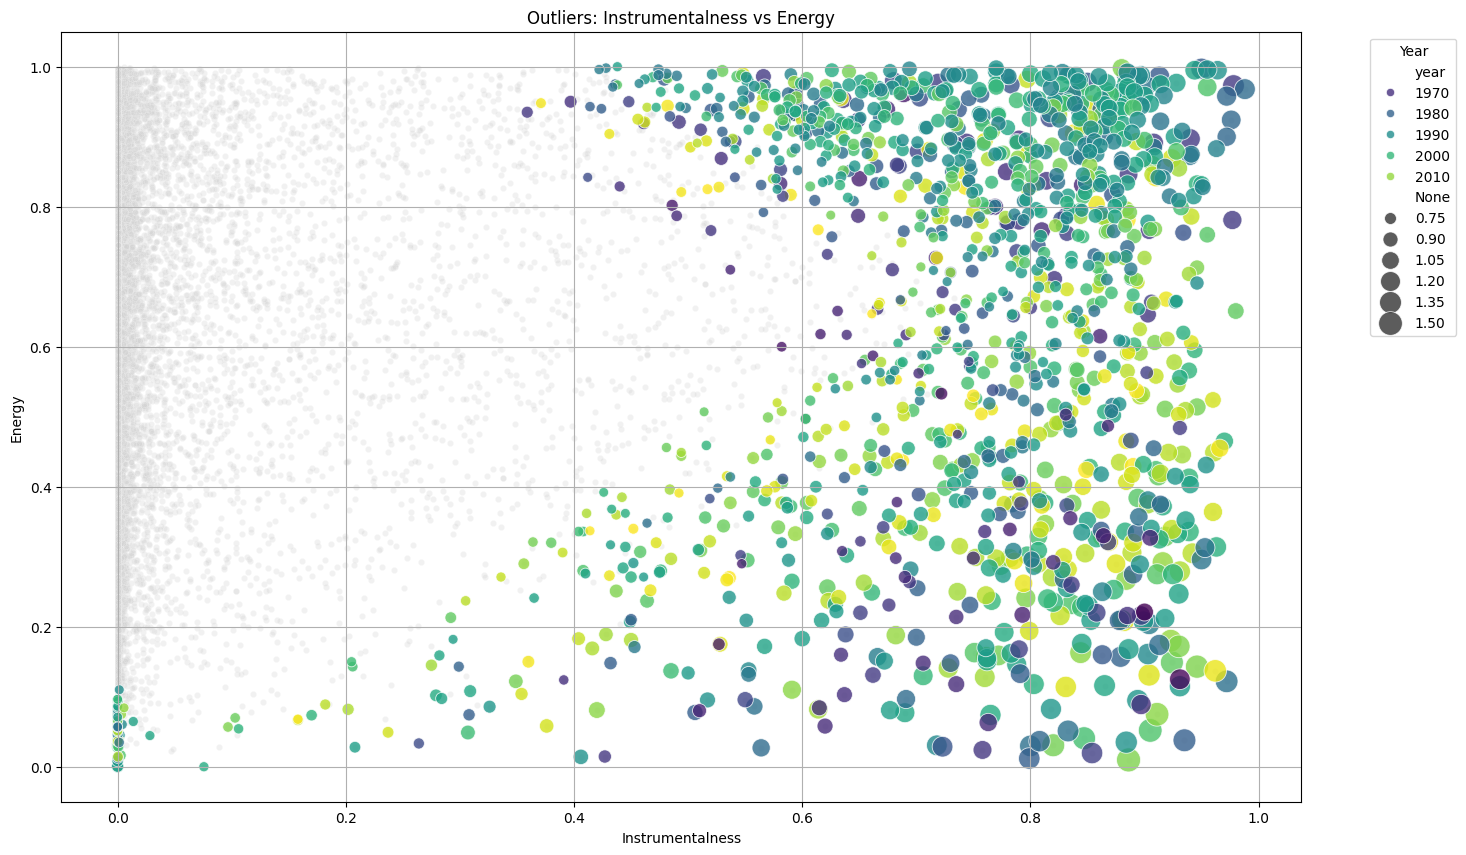

In [7]:


yearly_trend = audio_features.groupby('year')[['instrumentalness', 'energy']].mean()

instrumentalness_deviation = (audio_features['instrumentalness'] - audio_features['year'].map(yearly_trend['instrumentalness'])).abs()
energy_deviation = (audio_features['energy'] - audio_features['year'].map(yearly_trend['energy'])).abs()

trend_outlier_score = instrumentalness_deviation + energy_deviation

top_outliers = audio_features.loc[trend_outlier_score.nlargest(int(0.05*len(audio_features))).index]

plt.figure(figsize=(16,10))

sns.scatterplot(
    x='instrumentalness',
    y='energy',
    data=audio_features,
    color='lightgray',
    alpha=0.3,
    s=20
)

sns.scatterplot(
    x='instrumentalness',
    y='energy',
    data=top_outliers,
    hue='year',                    
    palette='viridis',
    size=trend_outlier_score.loc[top_outliers.index],  
    sizes=(50, 300),
    alpha=0.8
)

plt.title("Outliers: Instrumentalness vs Energy")
plt.xlabel("Instrumentalness")
plt.ylabel("Energy")
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05,1), loc=2)
plt.show()

